In [1]:
#Install required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# !pip install mlxtend
from mlxtend.frequent_patterns import association_rules,apriori
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\priya\Downloads\Association Rules\Association Rules\Online retail.xlsx',header=None,names=['Products'],index_col=None)

In [3]:
df.head(15)


,Products
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
5,low fat yogurt
6,"whole wheat pasta,french fries"
7,"soup,light cream,shallot"
8,"frozen vegetables,spaghetti,green tea"
9,french fries


In [4]:
df.value_counts()

Products                                                                                                                  
cookies                                                                                                                       223
french fries                                                                                                                  132
escalope                                                                                                                      101
mineral water                                                                                                                  93
eggs                                                                                                                           90
                                                                                                                             ... 
frozen vegetables,tomatoes,milk,vegetables mix,eggs,chocolate,french fries,low fat yogurt        

In [5]:
print(df)

                                               Products
0     shrimp,almonds,avocado,vegetables mix,green gr...
1                                burgers,meatballs,eggs
2                                               chutney
3                                        turkey,avocado
4     mineral water,milk,energy bar,whole wheat rice...
...                                                 ...
7496                      butter,light mayo,fresh bread
7497  burgers,frozen vegetables,eggs,french fries,ma...
7498                                            chicken
7499                                 escalope,green tea
7500    eggs,frozen smoothie,yogurt cake,low fat yogurt

[7501 rows x 1 columns]


In [6]:
df.dtypes

Products    object
dtype: object

In [7]:
df.isna().sum()

Products    0
dtype: int64

In [8]:
def text_split(txt):
    return txt.split(',')

In [9]:
data = df['Products'].apply(text_split)
print(data)

0       [shrimp, almonds, avocado, vegetables mix, gre...
1                              [burgers, meatballs, eggs]
2                                               [chutney]
3                                       [turkey, avocado]
4       [mineral water, milk, energy bar, whole wheat ...
                              ...                        
7496                    [butter, light mayo, fresh bread]
7497    [burgers, frozen vegetables, eggs, french frie...
7498                                            [chicken]
7499                                [escalope, green tea]
7500    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: Products, Length: 7501, dtype: object


In [10]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
encoded_df = te.fit_transform(data)

In [11]:
encoded_df

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [12]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [13]:
data = pd.DataFrame(encoded_df, columns=te.columns_)

In [14]:
data.replace([True,False],[1,0], inplace=True)

In [15]:
# Generate frequent itemsets using the Apriori algorithm
# Set the minimum support threshold to 0.001
scores = apriori(data,min_support=0.001, use_colnames=True, low_memory=True)
scores

,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.004666,(asparagus)
3,0.033329,(avocado)
4,0.004533,(babies food)
...,...,...
6773,0.001466,"(spaghetti, mineral water, frozen vegetables, ..."
6774,0.001200,"(turkey, spaghetti, mineral water, frozen vege..."
6775,0.001067,"(olive oil, spaghetti, mineral water, frozen v..."
6776,0.001067,"(herb & pepper, spaghetti, pancakes, ground be..."


In [16]:
# Generate association rules from the frequent itemsets
# Set the minimum confidence threshold to 0.7
rules = association_rules(scores,min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(pancakes, bacon)",(spaghetti),0.002133,0.174110,0.001733,0.812500,4.666587,0.001362,4.404746,0.787390
1,"(chocolate, barbecue sauce)",(mineral water),0.001733,0.238368,0.001333,0.769231,3.227069,0.000920,3.300404,0.691319
2,"(turkey, black tea)",(eggs),0.002000,0.179709,0.001466,0.733333,4.080663,0.001107,3.076090,0.756454
3,"(frozen smoothie, black tea)",(milk),0.001466,0.129583,0.001200,0.818182,6.313973,0.001010,4.787295,0.842857
4,"(salmon, black tea)",(mineral water),0.001333,0.238368,0.001067,0.800000,3.356152,0.000749,3.808159,0.702977
...,...,...,...,...,...,...,...,...,...,...
195,"(frozen vegetables, soup, milk, spaghetti)",(mineral water),0.001466,0.238368,0.001067,0.727273,3.051047,0.000717,2.792650,0.673231
196,"(frozen vegetables, turkey, milk, spaghetti)",(mineral water),0.001333,0.238368,0.001200,0.900000,3.775671,0.000882,7.616318,0.736128
197,"(frozen vegetables, tomatoes, mineral water, o...",(spaghetti),0.001333,0.174110,0.001067,0.800000,4.594793,0.000834,4.129449,0.783407
198,"(pancakes, herb & pepper, ground beef, mineral...",(spaghetti),0.001466,0.174110,0.001067,0.727273,4.177085,0.000811,3.028263,0.761716


In [17]:
rules.sort_values(by = 'lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
112,"(eggs, pasta, mineral water)",(shrimp),0.001466,0.071457,0.001333,0.909091,12.722185,0.001228,10.213971,0.922750
115,"(mushroom cream sauce, french fries, pasta)",(escalope),0.001067,0.079323,0.001067,1.000000,12.606723,0.000982,inf,0.921660
31,"(pasta, milk)",(shrimp),0.001866,0.071457,0.001600,0.857143,11.995203,0.001466,6.499800,0.918347
18,"(mushroom cream sauce, pasta)",(escalope),0.002666,0.079323,0.002533,0.950000,11.976387,0.002321,18.413545,0.918953
35,"(pasta, mineral water)",(shrimp),0.002133,0.071457,0.001600,0.750000,10.495802,0.001447,3.714171,0.906658
...,...,...,...,...,...,...,...,...,...,...
13,"(cooking oil, whole wheat pasta)",(mineral water),0.002266,0.238368,0.001600,0.705882,2.961311,0.001060,2.589548,0.663816
155,"(soup, milk, shrimp)",(mineral water),0.002266,0.238368,0.001600,0.705882,2.961311,0.001060,2.589548,0.663816
16,"(eggs, tomato sauce)",(mineral water),0.002666,0.238368,0.001866,0.700000,2.936633,0.001231,2.538773,0.661237
88,"(frozen vegetables, chocolate, olive oil)",(mineral water),0.003999,0.238368,0.002800,0.700000,2.936633,0.001846,2.538773,0.662122


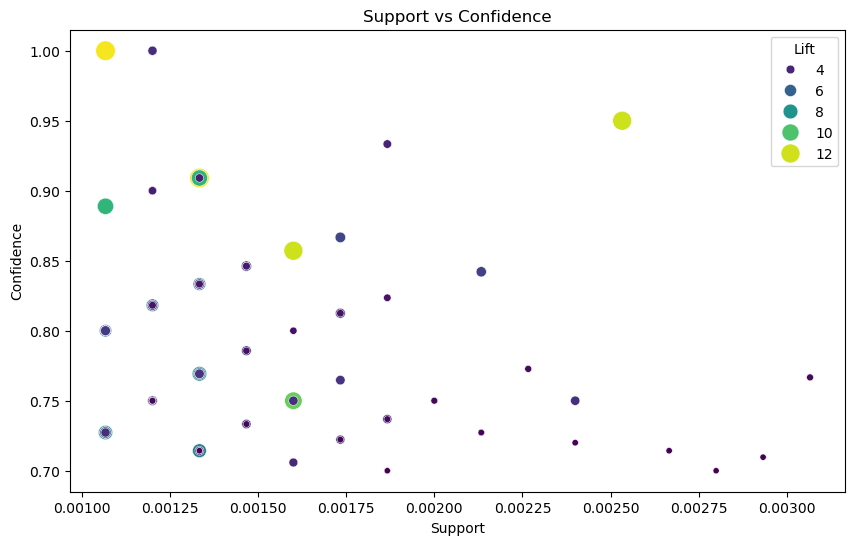

In [18]:
# Plotting Support vs Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()